## Case Study: Lead Scoring

### Objective 

 Build a model in order to increase the lead conversion rate i,e: get in touch with those leads who are more likely to be converted into a customer. In order to achieve the objective, we need to build a logistic regression model which can assign a score starting from 0 to 100 next to the lead . A higher score means a lead who is most likely to convert or a hot lead. Whereas, a lower score means a cold lead which is less likely to be converted

In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

#For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#to scale our data
from sklearn.preprocessing import scale

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [3]:
# Import the dataset. Please change the path as per the requirement
df = pd.read_csv(r"C:\Users\91973\Desktop\Data_Science\Course_2_Machine_Learning_1\Lead_Scoring_Case_Study\Lead_Scoring_Case_Study\Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [382]:
df['Specialization'].isnull().sum()

1438

### Basic EDA on the dataset

In [383]:
#Checking the Dataframes
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [384]:
# count of rows and columns
df.shape

(9240, 37)

In [385]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [386]:
info_df = pd.DataFrame(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

The dataset has null values present which needs to be taken care. Also we know that Many of the categorical variables have a level called 'Select'. It appears in the dataset when an user does not select any option from the available drop-down menu of the form. Thus having 'Select' is same as having a null value. Hence, this also needs to be handled separately

### Data Preparation

In [387]:
#Handling Duplicate Rows
df.drop_duplicates(subset='Lead Number')
df.shape

(9240, 37)

 there is no duplicate rows are present in the dataset

In [388]:
# Convert all the Select into NaN
df_1 = df.replace('Select', np.nan)

In [389]:
# Again look at the dataset
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   5860 

In [390]:
#Let us check the number of nulls in each column
df_1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [391]:
# % of null value in each column is:
c_df=pd.DataFrame((round(100*(df_1.isnull().sum()/len(df_1.index)), 2))).reset_index().rename(columns={'index':'column_name',0:'percentage'}).sort_values('percentage',ascending=False)
c_df

,column_name,percentage
13,How did you hear about X Education,78.46
28,Lead Profile,74.19
25,Lead Quality,51.59
33,Asymmetrique Profile Score,45.65
32,Asymmetrique Activity Score,45.65
30,Asymmetrique Activity Index,45.65
31,Asymmetrique Profile Index,45.65
29,City,39.71
12,Specialization,36.58
24,Tags,36.29


In [392]:
# rows having all missing values
df_1.isnull().all(axis=1).sum()

0

In [393]:
#number of null values by rows:
pd.DataFrame(round(100*df_1.isnull().sum(axis=1)/df_1.shape[1],2)).reset_index().rename(columns={'index':'rownum',0:'%_of_total_null_values'}).sort_values('%_of_total_null_values',ascending=False)

,rownum,%_of_total_null_values
5840,5840,40.54
2942,2942,37.84
3928,3928,37.84
4768,4768,35.14
3897,3897,35.14
2761,2761,35.14
3899,3899,35.14
6654,6654,35.14
3906,3906,35.14
3915,3915,35.14


In [394]:
# Identifying if any column exists with only null values
df_1.isnull().all(axis=0).any()

False

In [395]:
# Dropping all columns with only 0 values (If exists)
df_1.loc[:, (df_1 != 0).any(axis=0)]
df_1.shape

(9240, 37)

In [396]:
#Remove columns which has only one unique value
col_1 = list(df_1.columns)
df_1= df_1.loc[:,df_1.nunique()!=1]
df_1.shape
col_2 = list(df_1.columns)
removed = []
for i in col_1:
    if i not in col_2:
        print('Column Removed :'+i)


Column Removed :Magazine
Column Removed :Receive More Updates About Our Courses
Column Removed :Update me on Supply Chain Content
Column Removed :Get updates on DM Content
Column Removed :I agree to pay the amount through cheque


In [397]:
# Let delete the columns which has more than 70% of null values. from the datafrmae c_df, we know that there are two columns which
#has more than 70% of null values:
c_df_excl_columns = c_df[c_df['percentage']>70]
c_df_excl_columns

,column_name,percentage
13,How did you hear about X Education,78.46
28,Lead Profile,74.19


In [398]:
c_df_columns = c_df[c_df['percentage']<70]
c_df_columns

,column_name,percentage
25,Lead Quality,51.59
33,Asymmetrique Profile Score,45.65
32,Asymmetrique Activity Score,45.65
30,Asymmetrique Activity Index,45.65
31,Asymmetrique Profile Index,45.65
29,City,39.71
12,Specialization,36.58
24,Tags,36.29
15,What matters most to you in choosing a course,29.32
14,What is your current occupation,29.11


Let us look into the columns individually

 - Lead Quality (Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.)

In [399]:
df_1['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [400]:
#Since the dataset based on employee intution, we can imput the null values into Not Sure:
df_1['Lead Quality'] = df_1['Lead Quality'].replace(np.nan, 'Not Sure')


In [401]:
df_1['Lead Quality'].value_counts()

Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------

Next 4 columns which have 45.65% of missing value respectively are:
 - Asymmetrique Profile Score	
 - Asymmetrique Activity Score
 - Asymmetrique Activity Index
 - Asymmetrique Profile Index	
(Definition for all the 4 columns is: An index and score assigned to each customer based on their activity and their profile)

Observation from these columns are mentioned below

 - When Asymmetrique Profile Index is 01.High, unique Asymmetrique Profile Scores are 17,18,19,20
 - When Asymmetrique Profile Index is 02.Medium, unique Asymmetrique Profile Scores are 13,14,15,16
 - When Asymmetrique Profile Index is 03.Low, unique Asymmetrique Profile Scores are 11,12

Similarly:

 - When Asymmetrique Activity Index is 01.High, unique Asymmetrique Activity Scores are 16,17,18
 - When Asymmetrique Activity Index is 02.Medium, unique Asymmetrique Activity Scores are is 13,14,15
 - When Asymmetrique Activity Index is 03.Low, unique Asymmetrique Activity Scores are 7,8,9,10,11,12


From the above observation, it can be seen that, each of the Index (High,Medium & Low) has multiple Scores. Hence, imputation of these columns might be erroneous as we might not able to impute the scores information properly.

Hence, we can remove these columns from further analysis

#### Delete more columns from the dataset

 - We can drop 'Prospect ID' as it will not have any effect in the predicting model
 - We can drop 'City','Country' as geographical location is not a cause factor for an online course


In [402]:
# delete the above mentioned columns
df_1.drop(['How did you hear about X Education','Lead Profile','Prospect ID','City','Country','Asymmetrique Profile Index','Asymmetrique Profile Score','Asymmetrique Activity Index','Asymmetrique Activity Score'],axis=1,inplace=True)

In [403]:
# now the remaining columns and their missing value %
c_df=pd.DataFrame((round(100*(df_1.isnull().sum()/len(df_1.index)), 2))).reset_index().rename(columns={'index':'column_name',0:'percentage'}).sort_values('percentage',ascending=False)
c_df

,column_name,percentage
10,Specialization,36.58
19,Tags,36.29
12,What matters most to you in choosing a course,29.32
11,What is your current occupation,29.11
6,TotalVisits,1.48
8,Page Views Per Visit,1.48
9,Last Activity,1.11
2,Lead Source,0.39
15,X Education Forums,0.00
21,A free copy of Mastering The Interview,0.00


In [404]:
#now % of missing values by rows
r_df=pd.DataFrame(round(100*df_1.isnull().sum(axis=1)/df_1.shape[1],2)).reset_index().rename(columns={'index':'rownum',0:'%_of_total_null_values'}).sort_values('%_of_total_null_values',ascending=False)
r_df

,rownum,%_of_total_null_values
1131,1131,26.09
1130,1130,26.09
1127,1127,26.09
1126,1126,26.09
1124,1124,26.09
1123,1123,26.09
680,680,26.09
5840,5840,26.09
77,77,21.74
1393,1393,21.74


#### Column 'Specialization'

In [405]:
df_1['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [406]:
df_1['Specialization'].isnull().sum() # Total null value count is null value +  count of 'Select' which was not field by the users

3380

 Since Null values for this column is 36.58%, we require to introduce a separate element named 'Unknown' to address the issue

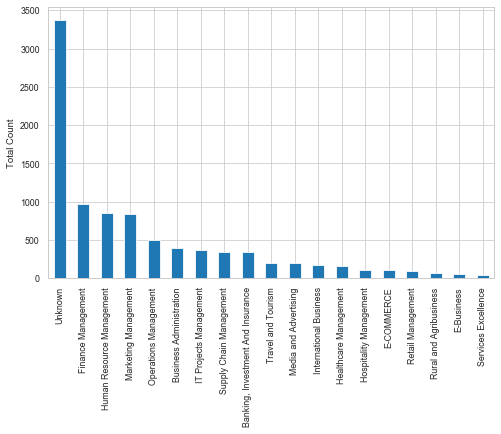

In [407]:
df_1['Specialization'].fillna("Unknown", inplace = True)
df_1['Specialization'].value_counts().plot(kind='bar',figsize=(8,5))
plt.ylabel('Total Count')
plt.show()

#### Column 'Tag'

In [408]:
df_1['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [409]:
df_1['Tags'].isnull().sum()

3353

 Since Null values for this column is 36.29%, we require to introduce a separate element named 'Unknown' to address the issue

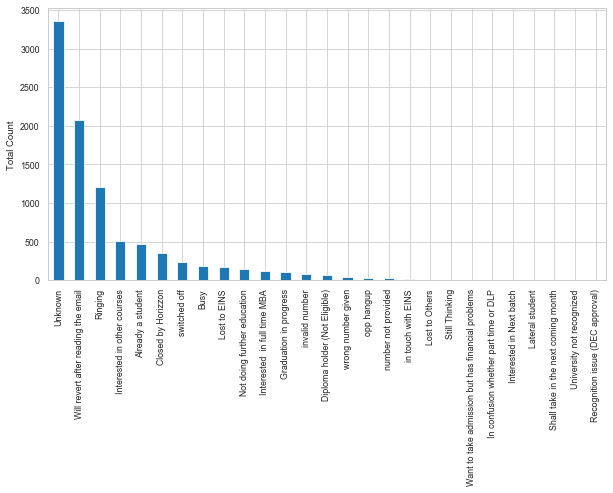

In [410]:
df_1['Tags'].fillna("Unknown", inplace = True)
df_1['Tags'].value_counts().plot(kind='bar',figsize=(10,5))
plt.ylabel('Total Count')
plt.show()

#### Column 'What matters most to you in choosing a course'

In [411]:
df_1['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [412]:
df_1['What matters most to you in choosing a course'].isnull().sum()

2709

Practically if we see, there is only one element which is present almost all the non null rows of this column. Hence, this column can treated as unique value column and hence can be dropped

In [413]:
df_1.drop('What matters most to you in choosing a course',axis=1,inplace=True)

#### Column 'What is your current occupation'

In [414]:
df_1['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [415]:
df_1['What is your current occupation'].isnull().sum()

2690

Since Null values for this column is 29.11%, we will be using mode to impute the missing values of thecolumn

In [416]:
df_1.loc[pd.isnull(df_1['What is your current occupation']), ['What is your current occupation']] = df_1['What is your current occupation'].value_counts().index[0]

In [417]:
df_1['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [418]:
# now check the columns and their missing value %
c_df=pd.DataFrame((round(100*(df_1.isnull().sum()/len(df_1.index)), 2))).reset_index().rename(columns={'index':'column_name',0:'percentage'}).sort_values('percentage',ascending=False)
c_df

,column_name,percentage
6,TotalVisits,1.48
8,Page Views Per Visit,1.48
9,Last Activity,1.11
2,Lead Source,0.39
0,Lead Number,0.00
13,Newspaper Article,0.00
20,A free copy of Mastering The Interview,0.00
19,Lead Quality,0.00
18,Tags,0.00
17,Through Recommendations,0.00


Delete rows with more than 20 percent missing values

In [419]:
a = [int(i) for i in (list(r_df[r_df['%_of_total_null_values']>20].rownum))]
a

[1131,
 1130,
 1127,
 1126,
 1124,
 1123,
 680,
 5840,
 77,
 1393,
 180,
 179,
 4605,
 3928,
 836,
 2942,
 994,
 134,
 7847,
 81]

In [420]:
for i in range(len(df_1)):
    if i in a:
        df_1.drop(index=i,inplace = True)

In [421]:
df_1.shape

(9220, 22)

In [422]:
# check the percentage of missing values now by each columns:
c_df=pd.DataFrame((round(100*(df_1.isnull().sum()/len(df_1.index)), 2))).reset_index().rename(columns={'index':'column_name',0:'percentage'}).sort_values('percentage',ascending=False)
c_df

,column_name,percentage
6,TotalVisits,1.27
8,Page Views Per Visit,1.27
9,Last Activity,1.01
2,Lead Source,0.34
0,Lead Number,0.00
13,Newspaper Article,0.00
20,A free copy of Mastering The Interview,0.00
19,Lead Quality,0.00
18,Tags,0.00
17,Through Recommendations,0.00


In [423]:
# Let us fill the rest of the columns' missing values with their respective median
df_1['TotalVisits'].replace(np.NaN, df_1['TotalVisits'].median(), inplace =True)
df_1['Page Views Per Visit'].replace(np.NaN, df_1['Page Views Per Visit'].median(), inplace =True)

In [424]:
# Let us fill the rest of the columns' missing values with their respective mode
df_1.loc[pd.isnull(df_1['Last Activity']), ['Last Activity']] = df_1['Last Activity'].value_counts().index[0]
df_1.loc[pd.isnull(df_1['Lead Source']), ['Lead Source']] = df_1['Lead Source'].value_counts().index[0]

In [425]:
c_df=pd.DataFrame((round(100*(df_1.isnull().sum()/len(df_1.index)), 2))).reset_index().rename(columns={'index':'column_name',0:'percentage'}).sort_values('percentage',ascending=False)
c_df

,column_name,percentage
0,Lead Number,0.00
1,Lead Origin,0.00
20,A free copy of Mastering The Interview,0.00
19,Lead Quality,0.00
18,Tags,0.00
17,Through Recommendations,0.00
16,Digital Advertisement,0.00
15,Newspaper,0.00
14,X Education Forums,0.00
13,Newspaper Article,0.00


In [426]:
df_1.shape

(9220, 22)

### Checking for Outliers

In [427]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
df_1.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Lead Number,9220.00,617133.74,23384.99,579533.00,596459.25,615427.00,637283.00,650461.10,655375.20,659566.05,660737.00
Converted,9220.00,0.39,0.49,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00
TotalVisits,9220.00,3.44,4.82,0.00,1.00,3.00,5.00,7.00,10.00,17.00,251.00
Total Time Spent on Website,9220.00,487.59,548.21,0.00,11.75,248.00,936.00,1380.00,1562.00,1840.81,2272.00
Page Views Per Visit,9220.00,2.36,2.15,0.00,1.00,2.00,3.00,5.00,6.00,9.00,55.00


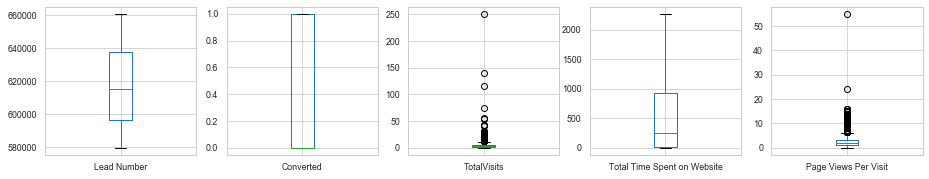

In [428]:
df_1.select_dtypes(include=[np.number]).plot(kind='box', subplots=True, layout=(10,10), figsize=(32,32), sharex=False, sharey=False)
plt.show()

#### Removing outlier values based on the Interquartile distance for some of the continuous variable


In [429]:
Q1 = df_1['TotalVisits'].quantile(0.25)
Q3 = df_1['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
df_1=df_1.loc[(df_1['TotalVisits'] >= Q1 - 1.5*IQR) & (df_1['TotalVisits'] <= Q3 + 1.4*IQR)]

Q1 = df_1['Page Views Per Visit'].quantile(0.25)
Q3 = df_1['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
df_1=df_1.loc[(df_1['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (df_1['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

df_1.shape

(8591, 22)

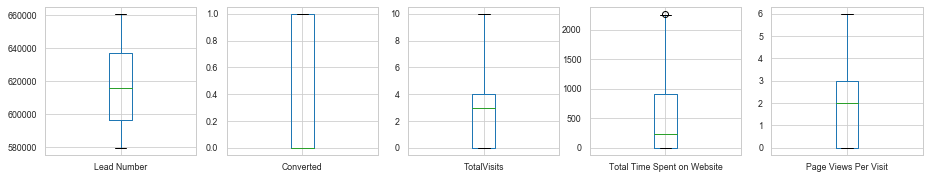

In [430]:
df_1.select_dtypes(include=[np.number]).plot(kind='box', subplots=True, layout=(10,10), figsize=(32,32), sharex=False, sharey=False)
plt.show()

### Preparing the data for modelling

####  Convert binary variables (Yes/No) to 0/1

In [431]:
# List of variables to map
varlist =  ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
           'Through Recommendations','A free copy of Mastering The Interview']

df_1[varlist]=df_1[varlist].apply(lambda x: x.map({'Yes': 1, "No": 0}))
df_1.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.00,0,0.00,Page Visited on Website,Unknown,Unemployed,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,Modified
1,660728,API,Organic Search,0,0,0,5.00,674,2.50,Email Opened,Unknown,Unemployed,0,0,0,0,0,0,Ringing,Not Sure,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.00,1532,2.00,Email Opened,Business Administration,Student,0,0,0,0,0,0,Will revert after reading the email,Might be,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,Ringing,Not Sure,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.00,1428,1.00,Converted to Lead,Unknown,Unemployed,0,0,0,0,0,0,Will revert after reading the email,Might be,0,Modified


#### For categorical variables with multiple levels, creating dummy features (one-hot encoded)

In [432]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy_var = pd.get_dummies(df_1[['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','Lead Quality','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
df_1 = pd.concat([df_1, dummy_var], axis=1)

In [433]:
df_1.shape

(8591, 130)

In [434]:
# drop the source categorical columns from which we have created dummy variables:
df_1.drop('Lead Origin',axis=1,inplace=True)
df_1.drop('Lead Source',axis=1,inplace=True)
df_1.drop('Last Activity',axis=1,inplace=True)
df_1.drop('Specialization',axis=1,inplace=True)
df_1.drop('What is your current occupation',axis=1,inplace=True)
df_1.drop('Tags',axis=1,inplace=True)
df_1.drop('Lead Quality',axis=1,inplace=True)
df_1.drop('Last Notable Activity',axis=1,inplace=True)
# Remove the column which are unknown:
df_1.drop('Specialization_Unknown',axis=1,inplace=True)
df_1.drop('Tags_Unknown',axis=1,inplace=True)

In [435]:
df_1.shape

(8591, 120)

In [436]:
df_1.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,0,5.00,674,2.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

In [437]:
# Ensuring there are no categorical columns left in the dataframe
cols = df_1.columns
num_cols = df_1._get_numeric_data().columns
list(set(cols) - set(num_cols))

[]

In [438]:
# Creating a copy of this origial dataset in case if needed later on
original_df = df_1.copy()
print(original_df.shape)
print(df_1.shape)

(8591, 120)
(8591, 120)


### Test-Train Split & Scalling

In [439]:
# Putting feature variable to X
X = df_1.drop(['Converted','Lead Number'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.00,674,2.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

In [440]:
# Putting response variable to y
y = df_1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [441]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [442]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1490,0,0,0.96,1.90,1.80,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4901,0,0,-0.33,0.40,-0.65,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [443]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013

### Checking the Lead Conversion Rate

In [444]:
### Checking the Lead Conversion Rate
converted = (sum(df_1['Converted'])/len(df_1['Converted'].index))*100
converted

38.202770341054595

We have almost 38% lead conversion rate

## Model Building

In [445]:
import statsmodels.api as sm

In [446]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6013
Model:                            GLM   Df Residuals:                     5905
Model Family:                Binomial   Df Model:                          107
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 06 Jan 2020   Deviance:                          nan
Time:                        22:08:06   Pearson chi2:                 2.09e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------

#### Feature Selection Using RFE

In [447]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [448]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True False False False False  True  True  True
 False  True False  True False False False False  True False  True  True
  True  True  True False False False  True False  True False False False
 False False  True  True False False False False False False]
[ 5 53 45  3 44 76 92 91 78 74 56 39 11  1 69 25 49 42 50 98 13  2 51 94
 89 10 22 59 87  1 33 90 48 99 55 52 31 35 38 65 88 83 62 26 12 79 96  1
 57 19 61 93 34 41 24 58 68 82 72 29 71 37 70 32 67 86 15 60 46 28 43 20
 40 80 16  1  1 14 85  7 63  1  1  1 18  1 21  1 17 54 73 23  

In [449]:
# check if the feature is present in top 20
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True,  True,  True, False,  True, False,  True, False, False,
       False, False,  True, False,  True,  True,  True,  True,  True,
       False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False])

In [450]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 5),
 ('Do Not Call', False, 53),
 ('TotalVisits', False, 45),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 44),
 ('Search', False, 76),
 ('Newspaper Article', False, 92),
 ('X Education Forums', False, 91),
 ('Newspaper', False, 78),
 ('Digital Advertisement', False, 74),
 ('Through Recommendations', False, 56),
 ('A free copy of Mastering The Interview', False, 39),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 69),
 ('Lead Origin_Quick Add Form', False, 25),
 ('Lead Source_Direct Traffic', False, 49),
 ('Lead Source_Facebook', False, 42),
 ('Lead Source_Google', False, 50),
 ('Lead Source_Live Chat', False, 98),
 ('Lead Source_NC_EDM', False, 13),
 ('Lead Source_Olark Chat', False, 2),
 ('Lead Source_Organic Search', False, 51),
 ('Lead Source_Pay per Click Ads', False, 94),
 ('Lead Source_Press_Release', False, 89),
 ('Lead Source_Reference', F

In [451]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested in other courses', 'Tags_Lateral student',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_opp hangup', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Worst',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [452]:
X_train_rfe = X_train[col]

In [453]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'L

#### Assessing the model with StatsModels

In [454]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6013
Model:                            GLM   Df Residuals:                     5992
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1272.9
Date:                Mon, 06 Jan 2020   Deviance:                       2545.7
Time:                        22:08:12   Pearson chi2:                 1.11e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [455]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [456]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Tags_Closed by Horizzon,1.29
1,Lead Source_Welingak Website,1.26
8,Tags_Not doing further education,1.10
7,Tags_Lost to EINS,1.04
4,Tags_Diploma holder (Not Eligible),1.03
14,Tags_switched off,1.02
19,Last Notable Activity_Olark Chat Conversation,1.01
17,Last Notable Activity_Email Link Clicked,1.01
15,Tags_wrong number given,1.01
11,Tags_invalid number,1.01


In [457]:
X = X_train_rfe.drop(['Tags_Lateral student'],axis=1)

In [458]:
X_train_sm = sm.add_constant(X)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6013
Model:                            GLM   Df Residuals:                     5993
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1275.8
Date:                Mon, 06 Jan 2020   Deviance:                       2551.7
Time:                        22:08:14   Pearson chi2:                 1.11e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [459]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Tags_Closed by Horizzon,1.29
1,Lead Source_Welingak Website,1.26
7,Tags_Not doing further education,1.10
6,Tags_Lost to EINS,1.04
4,Tags_Diploma holder (Not Eligible),1.03
13,Tags_switched off,1.02
18,Last Notable Activity_Olark Chat Conversation,1.01
16,Last Notable Activity_Email Link Clicked,1.01
14,Tags_wrong number given,1.01
10,Tags_invalid number,1.01


In [460]:
X = X.drop(['Tags_number not provided'],axis=1)

In [461]:
X_train_sm = sm.add_constant(X)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6013
Model:                            GLM   Df Residuals:                     5994
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1285.8
Date:                Mon, 06 Jan 2020   Deviance:                       2571.7
Time:                        22:08:15   Pearson chi2:                 1.08e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [462]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Tags_Closed by Horizzon,1.29
1,Lead Source_Welingak Website,1.26
7,Tags_Not doing further education,1.10
6,Tags_Lost to EINS,1.04
4,Tags_Diploma holder (Not Eligible),1.03
12,Tags_switched off,1.02
17,Last Notable Activity_Olark Chat Conversation,1.01
15,Last Notable Activity_Email Link Clicked,1.01
13,Tags_wrong number given,1.01
10,Tags_invalid number,1.01


In [463]:
X = X.drop(['Tags_wrong number given'],axis=1)

In [464]:
X_train_sm = sm.add_constant(X)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6013
Model:                            GLM   Df Residuals:                     5995
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1298.2
Date:                Mon, 06 Jan 2020   Deviance:                       2596.5
Time:                        22:08:15   Pearson chi2:                 1.06e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [465]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Tags_Closed by Horizzon,1.29
1,Lead Source_Welingak Website,1.26
7,Tags_Not doing further education,1.10
6,Tags_Lost to EINS,1.04
4,Tags_Diploma holder (Not Eligible),1.03
12,Tags_switched off,1.02
16,Last Notable Activity_Olark Chat Conversation,1.01
10,Tags_invalid number,1.01
14,Last Notable Activity_Email Link Clicked,1.01
11,Tags_opp hangup,1.00


In [466]:
X = X.drop(['Tags_Not doing further education'],axis=1)

In [467]:
X_train_sm = sm.add_constant(X)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6013
Model:                            GLM   Df Residuals:                     5996
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1306.3
Date:                Mon, 06 Jan 2020   Deviance:                       2612.7
Time:                        22:08:16   Pearson chi2:                 1.07e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [468]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Tags_Closed by Horizzon,1.29
1,Lead Source_Welingak Website,1.26
6,Tags_Lost to EINS,1.04
4,Tags_Diploma holder (Not Eligible),1.03
11,Tags_switched off,1.02
9,Tags_invalid number,1.01
13,Last Notable Activity_Email Link Clicked,1.01
15,Last Notable Activity_Olark Chat Conversation,1.01
10,Tags_opp hangup,1.00
0,Lead Origin_Lead Add Form,0.77


In [469]:
X = X.drop(['Lead Origin_Lead Add Form'],axis=1)

In [470]:
X_train_sm = sm.add_constant(X)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6013
Model:                            GLM   Df Residuals:                     5997
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1307.0
Date:                Mon, 06 Jan 2020   Deviance:                       2614.1
Time:                        22:08:18   Pearson chi2:                 1.06e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [471]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Tags_Closed by Horizzon,1.07
5,Tags_Lost to EINS,1.04
0,Lead Source_Welingak Website,1.03
3,Tags_Diploma holder (Not Eligible),1.03
10,Tags_switched off,1.02
8,Tags_invalid number,1.01
12,Last Notable Activity_Email Link Clicked,1.01
14,Last Notable Activity_Olark Chat Conversation,1.01
9,Tags_opp hangup,1.00
11,Lead Quality_Worst,0.39


In [472]:
X = X.drop(['Tags_Diploma holder (Not Eligible)'],axis=1)

In [473]:
X_train_sm = sm.add_constant(X)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6013
Model:                            GLM   Df Residuals:                     5998
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1308.3
Date:                Mon, 06 Jan 2020   Deviance:                       2616.7
Time:                        22:08:20   Pearson chi2:                 1.07e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [474]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Tags_Closed by Horizzon,1.07
4,Tags_Lost to EINS,1.04
0,Lead Source_Welingak Website,1.03
9,Tags_switched off,1.02
7,Tags_invalid number,1.01
11,Last Notable Activity_Email Link Clicked,1.01
13,Last Notable Activity_Olark Chat Conversation,1.01
8,Tags_opp hangup,1.00
10,Lead Quality_Worst,0.39
5,Tags_Ringing,0.34


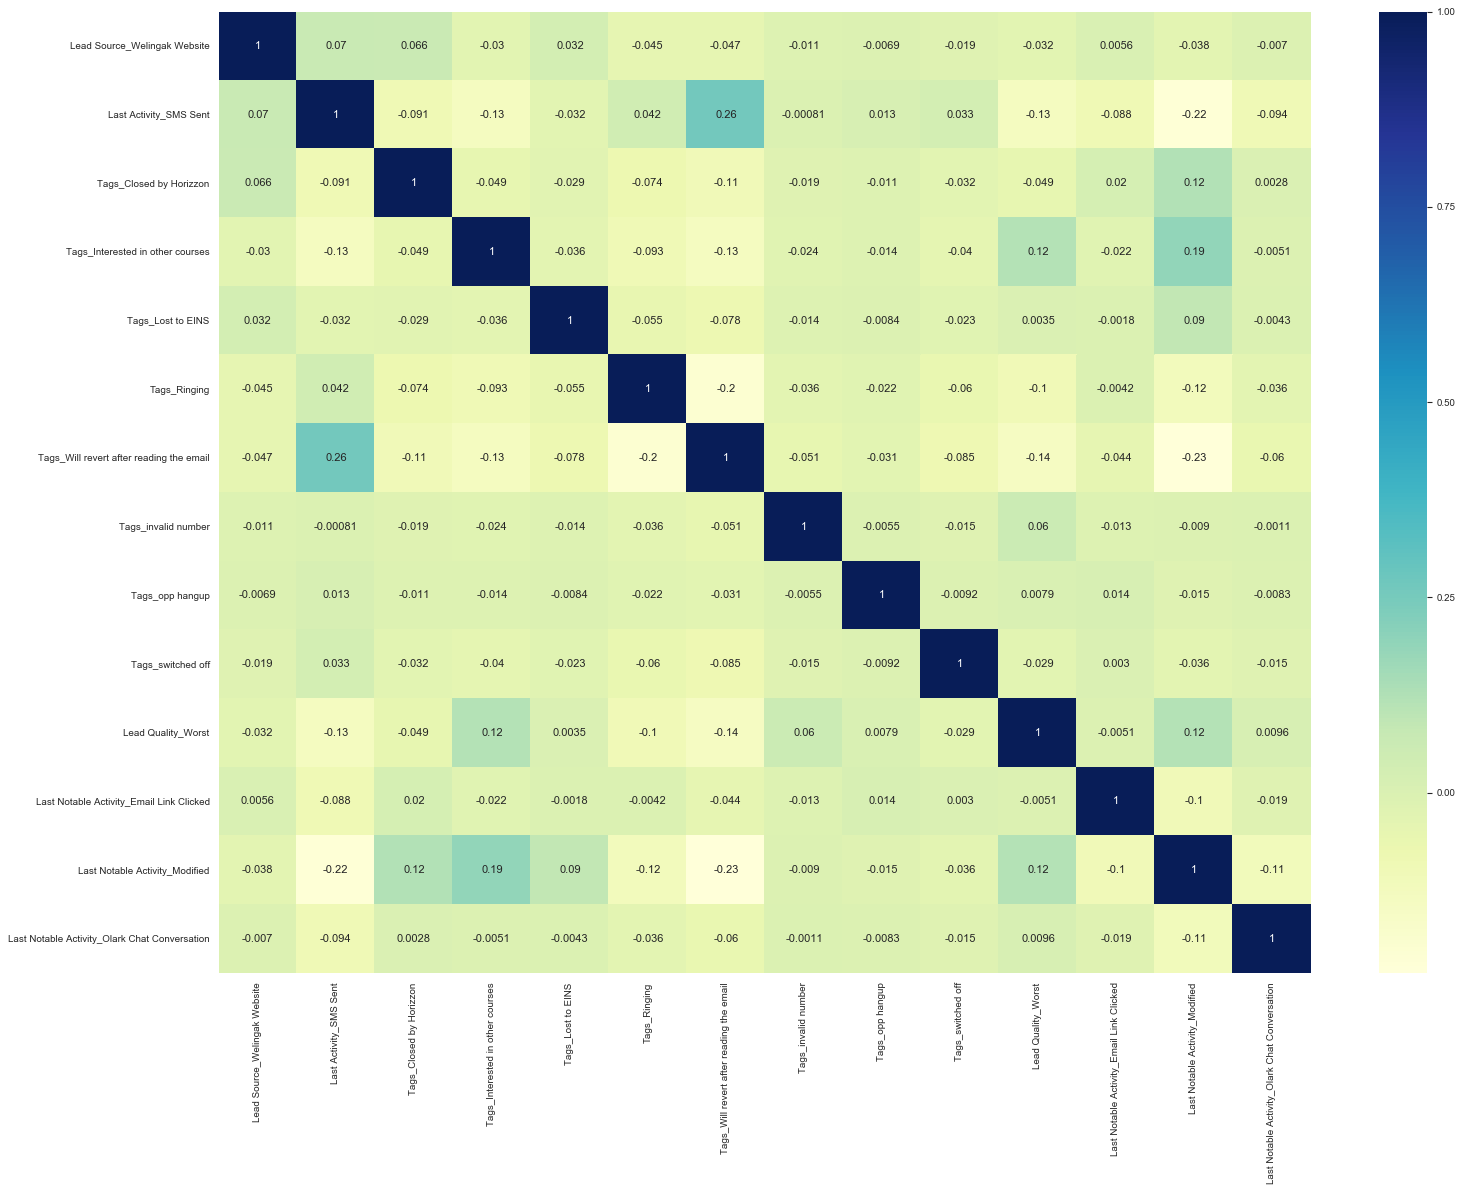

In [475]:
# Hitmap to check the multicolinierity
plt.figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

In [476]:
#Preserving the columns for future uses
col_1 = X.columns
col_1

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_opp hangup', 'Tags_switched off', 'Lead Quality_Worst',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [477]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1490   0.97
4901   0.68
1804   0.97
3411   1.00
642    0.19
3152   0.01
3434   0.00
4223   1.00
7962   0.68
6986   0.68
dtype: float64

In [478]:
# reshaping the numpy array containing predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.97168856, 0.68380728, 0.97168856, 0.99640211, 0.19037677,
       0.00754076, 0.00112177, 0.99684201, 0.68380728, 0.68380728])

#### Creating a dataframe with actual converted information and conversion probabilities

In [479]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.97,1490
1,1,0.68,4901
2,1,0.97,1804
3,1,1.00,3411
4,0,0.19,642


#### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0


In [480]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,1,0.97,1490,1
1,1,0.68,4901,1
2,1,0.97,1804,1
3,1,1.00,3411,1
4,0,0.19,642,0


In [481]:
from sklearn import metrics

#### Creating Confusion Metrics

In [482]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3547  170]
 [ 280 2016]]


In [483]:
#Predicted            not_converted           converted
#Actual
#not_converted             3547               170
#converted                 280                2016

In [484]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9251621486778646


In [485]:
# check the VIF once again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Tags_Closed by Horizzon,1.07
4,Tags_Lost to EINS,1.04
0,Lead Source_Welingak Website,1.03
9,Tags_switched off,1.02
7,Tags_invalid number,1.01
11,Last Notable Activity_Email Link Clicked,1.01
13,Last Notable Activity_Olark Chat Conversation,1.01
8,Tags_opp hangup,1.00
10,Lead Quality_Worst,0.39
5,Tags_Ringing,0.34


 - All the features now have a p value of <0.05 with low VIF
 - Hence, features do not have any multicoliniearity between themselves. It also can be seen from the heatmap
 - The accuracy rate is 0.9251

### Metrics calculation beyond simply accuracy

In [486]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [487]:
print('TP: '+str(TP))
print('TN: '+str(TN))
print('FP: '+str(FP))
print('FN: '+str(FN))

TP: 2016
TN: 3547
FP: 170
FN: 280


In [488]:
# sensitivity of the model
TP / float(TP+FN)

0.8780487804878049

In [489]:
# specificity
TN / float(TN+FP)

0.9542641915523271

In [490]:
# Calculate the false postive rate 
print(FP/ float(TN+FP))


0.04573580844767285


In [491]:
# positive predictive value 
print (TP / float(TP+FP))


0.9222323879231473


In [492]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9268356414946434


In [493]:
#Precision
print (TP / float(TP+ FP))

0.9222323879231473


In [494]:
#Recall
print (TP / float(TP+ FN))

0.8780487804878049


### ROC Curve

In [495]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Graph')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [496]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

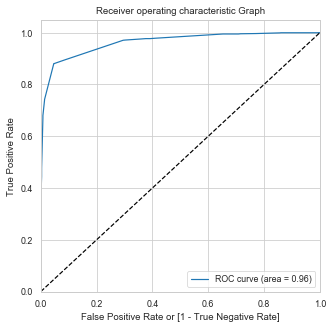

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.69034167e-04, 2.69034167e-04, 8.07102502e-04, 1.34517084e-03,
        1.34517084e-03, 1.34517084e-03, 1.61420500e-03, 1.61420500e-03,
        1.61420500e-03, 1.61420500e-03, 1.88323917e-03, 2.69034167e-03,
        2.69034167e-03, 2.69034167e-03, 7.26392252e-03, 7.26392252e-03,
        7.26392252e-03, 7.26392252e-03, 7.26392252e-03, 7.26392252e-03,
        7.26392252e-03, 1.31826742e-02, 1.31826742e-02, 4.57358084e-02,
        4.57358084e-02, 9.22787194e-02, 9.25477536e-02, 2.94323379e-01,
        2.95668550e-01, 2.95937584e-01, 2.98089857e-01, 3.00511165e-01,
        3.59698682e-01, 3.75840732e-01, 3.91175679e-01, 4.13505515e-01,
        6.52945924e-01, 6.55636266e-01, 6.57519505e-01, 6.71778316e-01,
        6.72316384e-01, 6.72854453e-01, 7.02717245e-01, 7.037933

In [497]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### Calculating the area under the curve(GINI)

In [498]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [499]:
auc = auc_val(fpr,tpr)
auc

0.9627940744990292

# Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity


In [500]:
# create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.97,1490,1,1,1,1,1,1,1,1,1,1,1
1,1,0.68,4901,1,1,1,1,1,1,1,1,0,0,0
2,1,0.97,1804,1,1,1,1,1,1,1,1,1,1,1
3,1,1.00,3411,1,1,1,1,1,1,1,1,1,1,1
4,0,0.19,642,0,1,1,0,0,0,0,0,0,0,0


In [501]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


      prob  accuracy  sensi  speci
0.00  0.00      0.38   1.00   0.00
0.10  0.10      0.81   0.97   0.70
0.20  0.20      0.90   0.90   0.91
0.30  0.30      0.93   0.88   0.95
0.40  0.40      0.93   0.88   0.95
0.50  0.50      0.93   0.88   0.95
0.60  0.60      0.93   0.88   0.95
0.70  0.70      0.89   0.74   0.99
0.80  0.80      0.89   0.74   0.99
0.90  0.90      0.87   0.68   0.99


## Let's plot accuracy sensitivity and specificity for various probabilities.


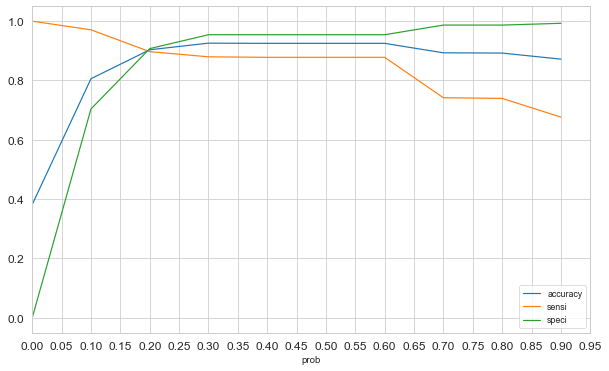

In [502]:

sns.set_style("whitegrid")
sns.set_context("paper")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

From the curve above, 0.20 is the optimum point to take it as a cutoff probability.


In [503]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.20 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.97,1490,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.68,4901,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.97,1804,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1.00,3411,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.19,642,0,1,1,0,0,0,0,0,0,0,0,0


In [504]:
# check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.903542324962581

In [505]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion1

array([[3373,  344],
       [ 236, 2060]], dtype=int64)

In [506]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [507]:
# Check the sensitivity 
TP / float(TP+FN)

0.8972125435540069

In [508]:
# calculate specificity
TN / float(TN+FP)

0.9074522464352973

In [509]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.09254775356470271


In [510]:
# Positive predictive value 
print (TP / float(TP+FP))


0.8569051580698835


In [511]:
# Negative predictive value
print (TN / float(TN+ FN))


0.9346079246328622


# Precision and Recall
Precision
 - TP / TP + FP

In [512]:
precision = confusion[1,1]/(confusion1[0,1]+confusion1[1,1])
precision

0.8386023294509152

Recall
 - TP / TP + FN

In [513]:
recall = confusion[1,1]/(confusion1[1,0]+confusion1[1,1])
recall

0.8780487804878049

Using sklearn utilities for the same

In [514]:
from sklearn.metrics import precision_score, recall_score

In [515]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8972125435540069

### Precision and recall tradeoff

In [516]:
from sklearn.metrics import precision_recall_curve

In [517]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       1
 1       1
 2       1
 3       1
 4       0
 5       0
 6       0
 7       1
 8       0
 9       1
 10      0
 11      0
 12      1
 13      1
 14      1
 15      0
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      1
 23      0
 24      1
 25      0
 26      0
 27      0
 28      0
 29      0
        ..
 5983    0
 5984    1
 5985    0
 5986    1
 5987    0
 5988    0
 5989    0
 5990    1
 5991    1
 5992    0
 5993    1
 5994    0
 5995    1
 5996    0
 5997    0
 5998    1
 5999    0
 6000    0
 6001    0
 6002    1
 6003    0
 6004    1
 6005    0
 6006    0
 6007    1
 6008    0
 6009    1
 6010    0
 6011    1
 6012    1
 Name: Converted, Length: 6013, dtype: int64, 0       1
 1       1
 2       1
 3       1
 4       0
 5       0
 6       0
 7       1
 8       1
 9       1
 10      0
 11      0
 12      1
 13      1
 14      1
 15      0
 16      0
 17      0
 18      0
 19      1
 20      1
 21      0
 22      1
 23      0
 24      1
 25      

In [518]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

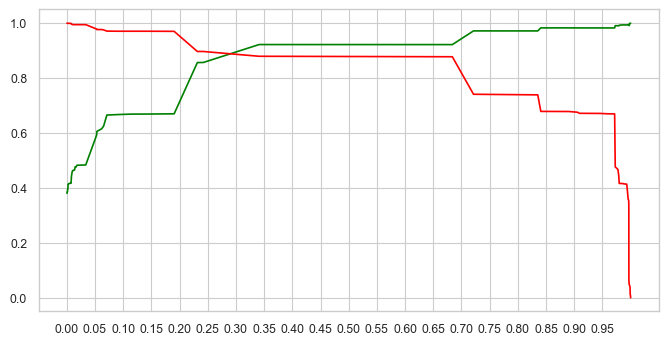

In [519]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

From the precision-recall graph above,the threshold value as close to 0.30. However we have got this with our previous threshold value of 0.20.

### Making predictions on the test set
Using the scaler function from the train dataset to transfor the test dataset


In [520]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2695,0,0,0.96,0.01,0.26,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7431,0,0,0.10,-0.26,-0.35,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [521]:
X_test = X_test[col_1]
X_test.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_opp hangup,Tags_switched off,Lead Quality_Worst,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
2695,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7431,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6242,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2871,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7560,0,0,0,0,0,0,0,0,0,0,1,0,0,1


Adding the constant

In [522]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [523]:
y_test_pred = res.predict(X_test_sm)

In [524]:
y_test_pred[:10]

2695   0.97
7431   0.19
6242   1.00
2871   0.03
7560   0.00
6911   0.03
5294   0.02
3234   0.97
485    0.01
4770   0.19
dtype: float64

In [525]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [526]:
y_pred_1.head()

,0
2695,0.97
7431,0.19
6242,1.00
2871,0.03
7560,0.00


In [527]:
# Convert y_test to a dataframe
y_test_df = pd.DataFrame(y_test)

In [528]:
# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index

In [529]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [530]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [531]:
y_pred_final.head()

,Converted,LeadID,0
0,1,2695,0.97
1,0,7431,0.19
2,1,6242,1.00
3,0,2871,0.03
4,0,7560,0.00


In [532]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [533]:
# Rearrange the columns
y_pred_final = y_pred_final.reindex_axis(['LeadID','Converted','Conversion_Prob'], axis=1)

In [534]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Conversion_Prob
0,2695,1,0.97
1,7431,0,0.19
2,6242,1,1.00
3,2871,0,0.03
4,7560,0,0.00


In [535]:
y_pred_final.shape

(2578, 3)

#### Use probability threshold value of 0.20 on the test dataset to predict if a lead will convert or not

In [536]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.20 else 0)

In [537]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,2695,1,0.97,1
1,7431,0,0.19,0
2,6242,1,1.00,1
3,2871,0,0.03,0
4,7560,0,0.00,0


In [538]:
# check the overall accuracy.
acc_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
acc_score

0.9053529868114818

In [539]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

[[1470  122]
 [ 122  864]]


In [540]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives


In [541]:
print('TP: '+str(TP))
print('TN: '+str(TN))
print('FP: '+str(FP))
print('FN: '+str(FN))

TP: 864
TN: 1470
FP: 122
FN: 122


### Showcasing the different metrics beyond accuracy on the test dataset
Sensitivity
 - TP / TP + FN

In [542]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8762677484787018

Specificity
 - TN / TN + FP

In [543]:
# Let us calculate specificity
TN / float(TN+FP)

0.9233668341708543

In [544]:
#False Postive Rate

In [545]:
print(FP/ float(TN+FP))

0.07663316582914573


##### Precision
-TP / TP + FP

In [546]:
Precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
Precision

0.8762677484787018

##### Recall
TP / TP + FN

In [547]:
Recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
Recall

0.8762677484787018

ROC Curve on test dataset

In [548]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [549]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )

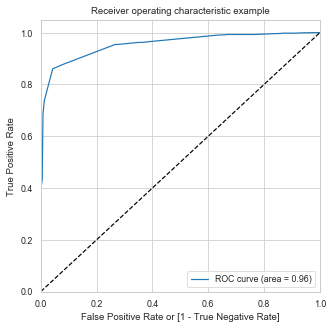

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.28140704e-04, 6.28140704e-04, 6.28140704e-04,
        6.28140704e-04, 6.28140704e-04, 6.28140704e-04, 6.28140704e-04,
        1.25628141e-03, 1.88442211e-03, 1.88442211e-03, 1.88442211e-03,
        1.88442211e-03, 1.88442211e-03, 2.51256281e-03, 5.02512563e-03,
        5.02512563e-03, 5.02512563e-03, 7.53768844e-03, 7.53768844e-03,
        7.53768844e-03, 1.25628141e-02, 4.14572864e-02, 4.20854271e-02,
        7.66331658e-02, 2.66331658e-01, 2.66959799e-01, 2.68844221e-01,
        2.71984925e-01, 2.75753769e-01, 3.41708543e-01, 3.54899497e-01,
        3.65577889e-01, 3.90703518e-01, 6.38190955e-01, 6.40703518e-01,
        6.43216080e-01, 6.63944724e-01, 6.64572864e-01, 7.04145729e-01,
        7.04773869e-01, 7.06658291e-01, 7.14824121e-01, 7.65075377e-01,
        8.57412060e-01, 8.58668342e-01, 8.59296482e-01, 8.61809045e-01,
        8.65577889e-01, 8.69974874e-01, 8.71231156e-01, 8.731155

In [550]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

 Area Under the Curve(GINI)

In [551]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [552]:
auc = auc_val(fpr,tpr)
auc

0.9555899426136769

#### Calculate Lead score

In [553]:
#Test dataset wirh Conversion Probability and the final predicted value for Converted
leads_test_pred = y_pred_final.copy()


In [554]:
#Train dataset along with the Conversion Probability and final predicted value for Converted
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.97,1490,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.68,4901,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.97,1804,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1.00,3411,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.19,642,0,1,1,0,0,0,0,0,0,0,0,0


In [555]:
# Drop columns from train dataset
leads_train_pred = leads_train_pred[['LeadID','Converted','Conversion_Prob','final_predicted']]
leads_train_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,1490,1,0.97,1
1,4901,1,0.68,1
2,1804,1,0.97,1
3,3411,1,1.00,1
4,642,0,0.19,0


#### Concatenate the train and the test dataset with the Conversion Probabilities

In [556]:
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,1490,1,0.97,1
1,4901,1,0.68,1
2,1804,1,0.97,1
3,3411,1,1.00,1
4,642,0,0.19,0


In [557]:
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6013, 4)
(2578, 4)
(8591, 4)


In [558]:
# Ensuring the LeadIDs are unique for each lead in the final dataframe
len(lead_full_pred['LeadID'].unique().tolist())

8591

In [559]:
# Calculate the Lead Score values
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted,Lead_Score
0,1490,1,0.97,1,97
1,4901,1,0.68,1,68
2,1804,1,0.97,1,97
3,3411,1,1.00,1,100
4,642,0,0.19,0,19


In [560]:
# Inspect the max of LeadIDs
#lead_full_pred.LeadID.max()

In [561]:
# Convert the LeadID column as index
lead_full_pred = lead_full_pred.set_index('LeadID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
LeadID,,,,
0,0,0.01,0,1
1,0,0.01,0,1
2,1,0.97,1,97
3,0,0.00,0,0
4,1,0.84,1,84


In [562]:
# Get the Lead Number column from original_leads dataframe
df = df[['Lead Number']]
df.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


Concatenating the 2 dataframes with the help of index.Hence, each Lead Number will have a lead score.

In [563]:
leads_with_score = pd.concat([df, lead_full_pred], axis=1)
leads_with_score.head(10)

,Lead Number,Converted,Conversion_Prob,final_predicted,Lead_Score
0,660737,0.00,0.01,0.00,1.00
1,660728,0.00,0.01,0.00,1.00
2,660727,1.00,0.97,1.00,97.00
3,660719,0.00,0.00,0.00,0.00
4,660681,1.00,0.84,1.00,84.00
5,660680,0.00,0.03,0.00,3.00
6,660673,1.00,0.84,1.00,84.00
7,660664,0.00,0.03,0.00,3.00
8,660624,0.00,0.19,0.00,19.00
9,660616,0.00,0.19,0.00,19.00


In [564]:
#Check the dataframe
leads_with_score.shape

(9240, 5)

In [565]:
#Inspectin if the final dataframe has any null values

total = pd.DataFrame(leads_with_score.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads_with_score.isnull().sum()/leads_with_score.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead_Score,649,7.02
final_predicted,649,7.02
Conversion_Prob,649,7.02
Converted,649,7.02
Lead Number,0,0.00


### Calculate Feature Importance

In [566]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Lead Source_Welingak Website                     5.02
Last Activity_SMS Sent                           2.22
Tags_Closed by Horizzon                          8.34
Tags_Interested in other courses                -1.43
Tags_Lost to EINS                                7.13
Tags_Ringing                                    -3.43
Tags_Will revert after reading the email         4.98
Tags_invalid number                             -3.07
Tags_opp hangup                                 -2.57
Tags_switched off                               -4.85
Lead Quality_Worst                              -2.82
Last Notable Activity_Email Link Clicked        -1.27
Last Notable Activity_Modified                  -1.91
Last Notable Activity_Olark Chat Conversation   -1.44
dtype: float64

In [567]:
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Lead Source_Welingak Website                     60.21
Last Activity_SMS Sent                           26.60
Tags_Closed by Horizzon                         100.00
Tags_Interested in other courses                -17.14
Tags_Lost to EINS                                85.51
Tags_Ringing                                    -41.14
Tags_Will revert after reading the email         59.73
Tags_invalid number                             -36.77
Tags_opp hangup                                 -30.84
Tags_switched off                               -58.11
Lead Quality_Worst                              -33.84
Last Notable Activity_Email Link Clicked        -15.24
Last Notable Activity_Modified                  -22.92
Last Notable Activity_Olark Chat Conversation   -17.22
dtype: float64

In [568]:
feature_importance_1 = pd.DataFrame(feature_importance)
feature_importance_1.reset_index()
feature_importance_1.rename(columns={'index':'feature',0:'rank'},inplace = True)
feature_importance_1 = feature_importance_1.sort_values('rank',ascending = False)
feature_importance_1.head(3) #top 3 features

,rank
Tags_Closed by Horizzon,100.00
Tags_Lost to EINS,85.51
Lead Source_Welingak Website,60.21
